## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

In [1]:
# Loading in the libraries
import os
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error



## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. Clean and pre-process the dataset as required and prepare the data for modelling.
4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters


1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.

In [2]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\victo\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [3]:
file_path = r"C:\Users\victo\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1"

files = os.listdir(file_path)
print(files)

['day.csv', 'hour.csv', 'Readme.txt']


In [4]:
data = pd.read_csv(file_path + "/hour.csv")
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


2. Visualize the structure of the dataset using appropriate libraries and plots.


Visualizing the dataset

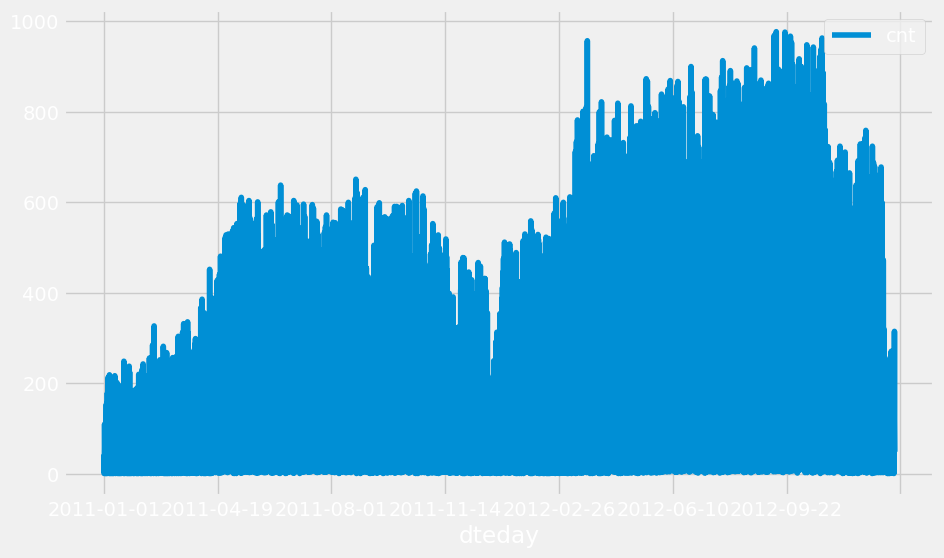

In [5]:
data.plot(x='dteday', y='cnt', figsize=(10, 6))
plt.show()

Performing a seasonal decomposition from a month of data

<Figure size 640x480 with 0 Axes>

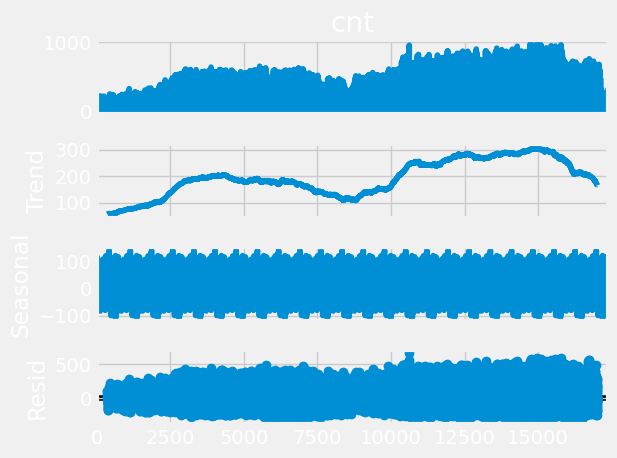

In [6]:
plt.clf()
# Perform seasonal decomposition with a reduced period
result = seasonal_decompose(data['cnt'], model='additive', period=(24*30))
result.plot()
plt.show()

Plotting the data from the last 6 months

In [7]:
# Get the last 6 months of data
shorter_data = data.tail(30*24*6)

shorter_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13059,13060,2012-07-03,3,1,7,8,0,2,1,1,0.74,0.6818,0.62,0.0896,42,604,646
13060,13061,2012-07-03,3,1,7,9,0,2,1,1,0.80,0.7424,0.49,0.1642,46,226,272
13061,13062,2012-07-03,3,1,7,10,0,2,1,1,0.82,0.7424,0.43,0.2239,56,153,209
13062,13063,2012-07-03,3,1,7,11,0,2,1,1,0.86,0.7576,0.34,0.1940,66,151,217
13063,13064,2012-07-03,3,1,7,12,0,2,1,1,0.88,0.7576,0.28,0.1940,74,198,272


<Figure size 640x480 with 0 Axes>

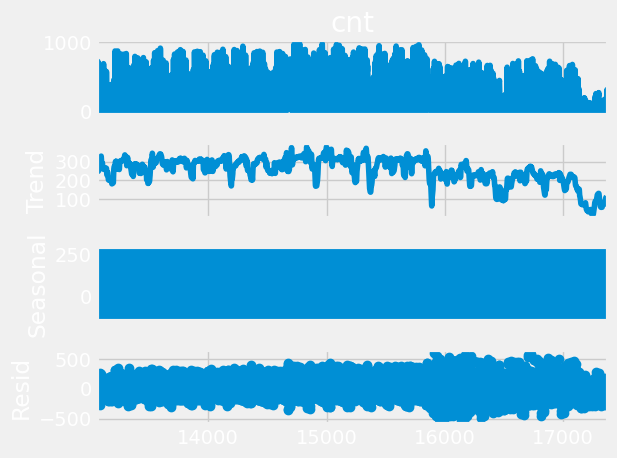

In [8]:
plt.clf()
# Perform seasonal decomposition with a reduced period
result = seasonal_decompose(shorter_data['cnt'], model='additive', period=(24))
result.plot()
plt.show()

3. Clean and pre-process the dataset as required and prepare the data for modelling.


Checking for null values in the dataset

In [9]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


As we have no missing values, im gonna preprocess the data

In [10]:
# Convert 'dteday' to datetime format
data['dteday'] = pd.to_datetime(data['dteday'])

# Verify the conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Test/Train split

AttributeError: 'Axes' object has no attribute 'axavline'

<Figure size 640x480 with 0 Axes>

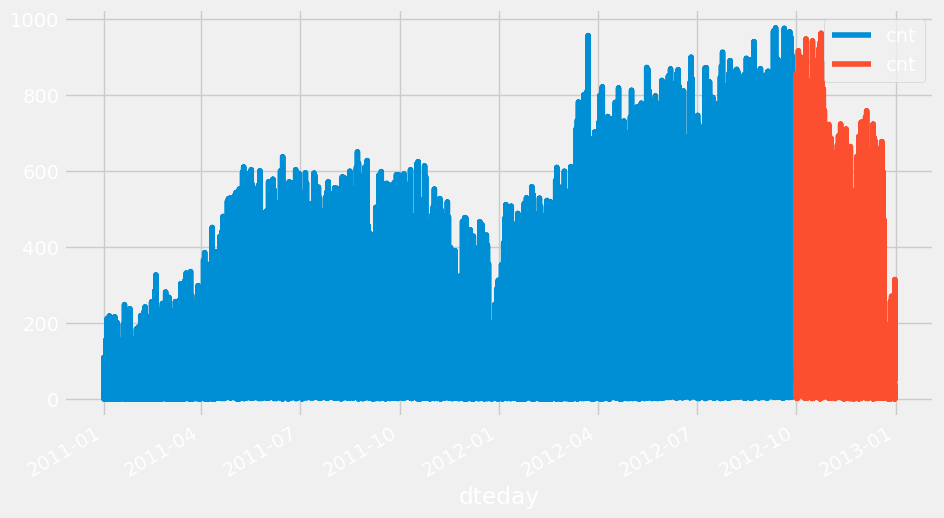

In [11]:
train = data.loc[data['dteday'] < '2012-10-01']
test = data.loc[data['dteday'] >= '2012-10-01']
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6))
train.plot(x='dteday', y='cnt', ax=ax)
test.plot(x='dteday', y='cnt', ax=ax)
ax.axavline(x='2012-10-01', color='red', linestyle='--')
ax.legend(['train', 'test'])
plt.show()

### Preparing data for modelling

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES_LR =[
    'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'
]
TARGET = 'cnt'

FEATURES_XGB = [
    'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 
    'cnt_1_day_lag', 'cnt_1_week_lag', 'cnt_1_month_lag', 'cnt_3_month_lag', 'cnt_1_year_lag', 'cnt_3_day_roll_mean', 
    'cnt_3_hour_roll_mean', 'cnt_3_week_roll_mean', 'cnt_3_month_roll_mean', 'cnt_1_year_roll_mean'
]

4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.


In [ ]:
#Creating the lag and rolling windows features for the "cnt" column for 1 day, 1 week, 1 month, 3 months and the last 3 day rolling mean, last 3 hours rolling mean

def create_features(data):
    
    data = data.copy()

    #Basic time-based features
    data['hour'] = data['dteday'].dt.hour
    data['day'] = data['dteday'].dt.day
    data['month'] = data['dteday'].dt.month
    data['year'] = data['dteday'].dt.year
    data['weekday'] = data['dteday'].dt.weekday


    data['cnt_1_day_lag'] = data['cnt'].shift(24)
    data['cnt_1_week_lag'] = data['cnt'].shift(24*7)
    data['cnt_1_month_lag'] = data['cnt'].shift(24*30)
    data['cnt_3_month_lag'] = data['cnt'].shift(24*30*3)
    data['cnt_1_year_lag'] = data['cnt'].shift(24*365)

    data['cnt_3_day_roll_mean'] = data['cnt'].rolling(window=24*3).mean()
    data['cnt_3_hour_roll_mean'] = data['cnt'].rolling(window=3).mean()
    data['cnt_3_week_roll_mean'] = data['cnt'].rolling(window=24*7*3).mean()
    data['cnt_3_month_roll_mean'] = data['cnt'].rolling(window=24*30*3).mean()
    data['cnt_1_year_roll_mean'] = data['cnt'].rolling(window=24*365).mean()

    return data

df = create_features(data)

Making the rolling window for rentals per month

<Figure size 640x480 with 0 Axes>

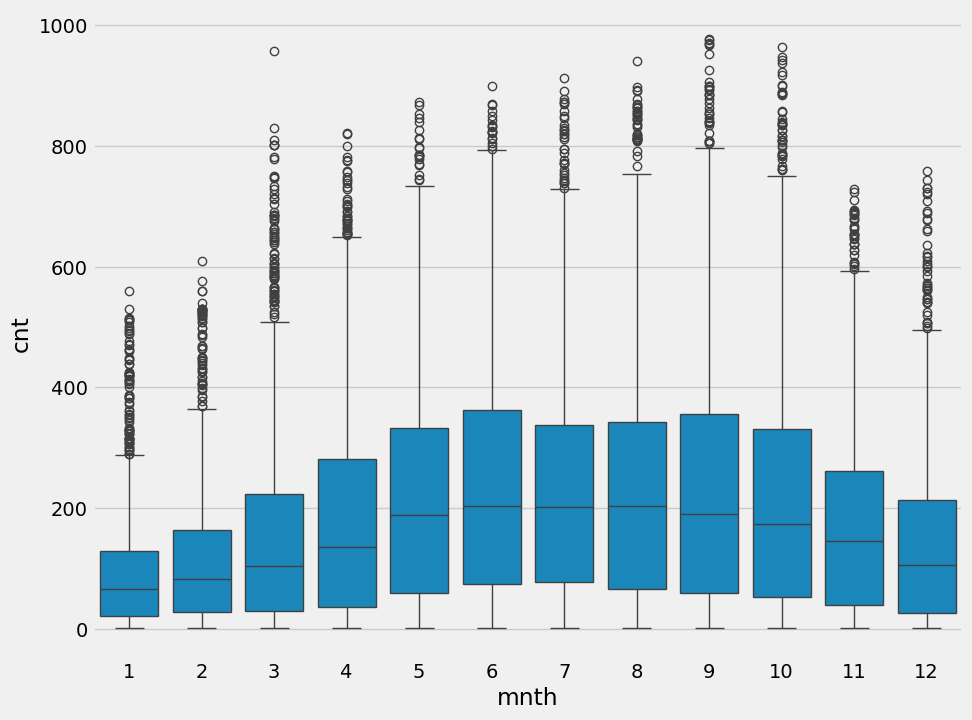

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='mnth', y='cnt', ax=ax)
plt.show()

Plotting per hour

<Figure size 640x480 with 0 Axes>

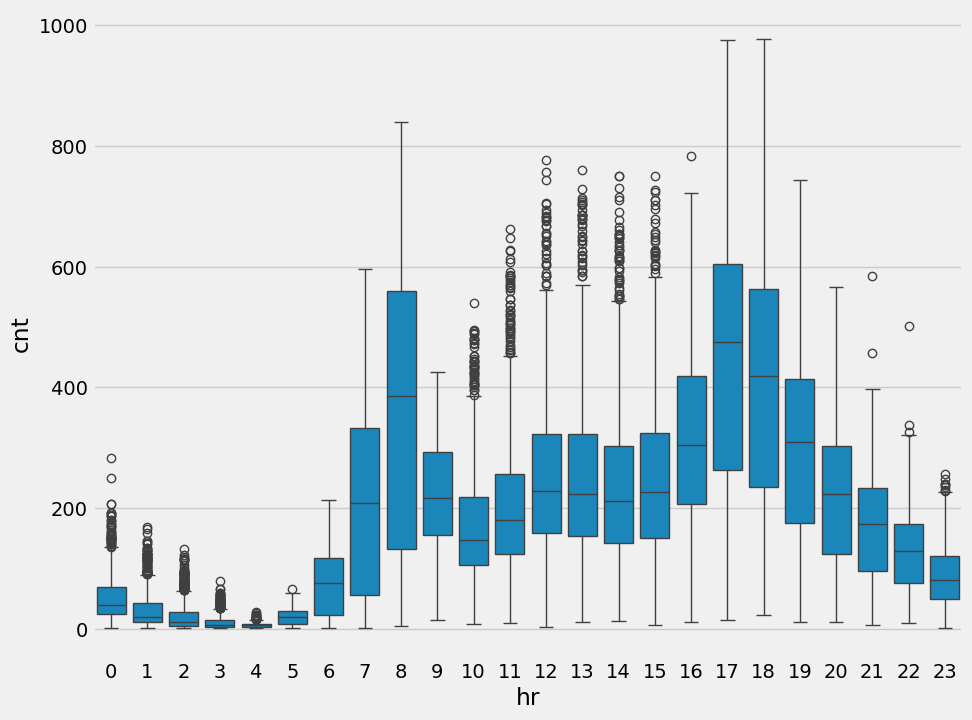

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='hr', y='cnt', ax=ax)
plt.show()

5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.


In [ ]:
# Linear Regression Data
X_train_lr = train[FEATURES_LR]
y_train_lr = train[TARGET]

X_test_lr = test[FEATURES_LR]
y_test_lr = test[TARGET]

# XGBoost Data
X_train_xgb = train[FEATURES_XGB]
y_train_xgb = train[TARGET]

X_test_xgb = test[FEATURES_XGB]
y_test_xgb = test[TARGET]

In [ ]:
# Initialize the lienar regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_train_lr = lr.predict(X_train_lr)

In [ ]:
# Evaluate the model
rmse_lr = np.sqrt(mean_squared_error(y_train_lr, y_pred_train_lr))
mae_lr = mean_absolute_error(y_train_lr, y_pred_train_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression MAE: {mae_lr}")

Linear Regression RMSE: 137.74155867066634
Linear Regression MAE: 102.78759286719303


Plotting Actual vs Predicted

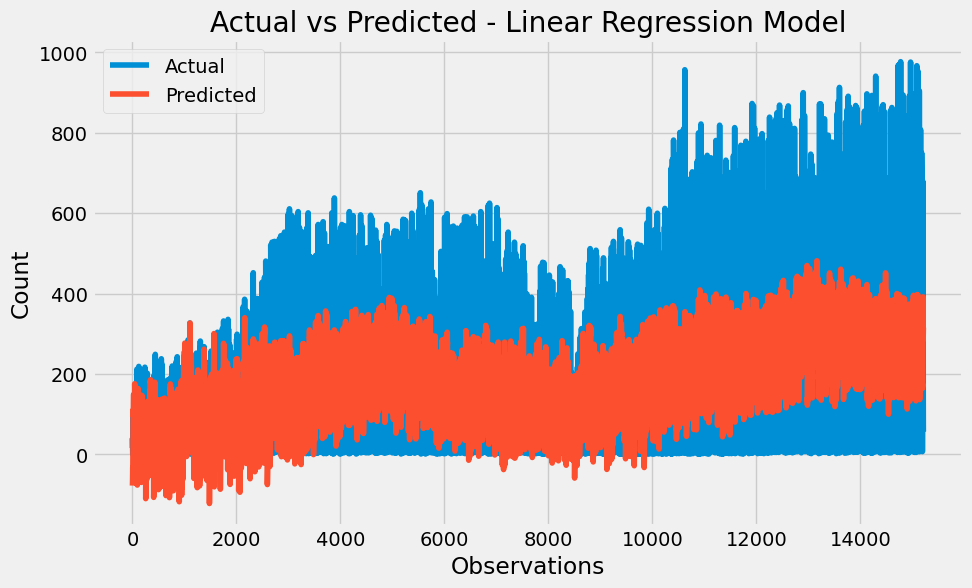

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_train_lr, label='Actual')
plt.plot(y_pred_train_lr, label='Predicted')
plt.title('Actual vs Predicted - Linear Regression Model')
plt.xlabel('Observations')
plt.ylabel('Count')
plt.legend()
plt.show()

6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.


In [ ]:
# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'learning_rate': 0.1,
    'colsample_bytree': 0.3,
    'subsample': 0.8,
}

# Watchlist for XGBoost
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Number of rounds for XGBoost
num_round = 1000
early_stopping_rounds = 50

# Train the model
xgb_model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=100)

# Make predictions
y_pred_train_xgb = xgb_model.predict(dtrain)

[0]	train-rmse:163.57634	eval-rmse:187.48047
[100]	train-rmse:48.80502	eval-rmse:78.77191
[200]	train-rmse:39.90337	eval-rmse:68.05461
[300]	train-rmse:35.07204	eval-rmse:61.36334
[400]	train-rmse:31.66683	eval-rmse:58.13086
[500]	train-rmse:29.12952	eval-rmse:54.93306
[600]	train-rmse:27.30725	eval-rmse:53.49781
[700]	train-rmse:25.59050	eval-rmse:51.57685
[800]	train-rmse:24.55258	eval-rmse:51.17123
[863]	train-rmse:24.13344	eval-rmse:51.38109


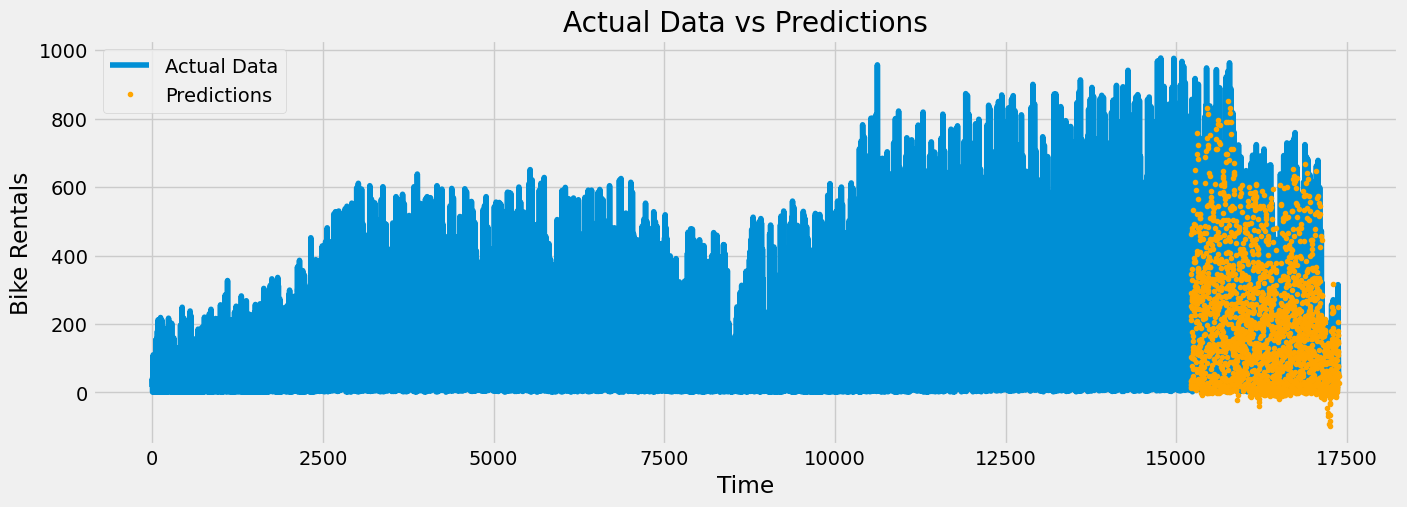

In [ ]:
# Ensure that 'prediction' column is added only once
if 'prediction' not in data.columns:
    test['prediction'] = xgb_model.predict(dtest)
    data = data.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# Plot the actual and predicted values
ax = data[['cnt']].plot(figsize=(15, 5))
data['prediction'].plot(ax=ax, style='.', color='orange')

# Add labels and legend
plt.legend(['Actual Data', 'Predictions'])
ax.set_title('Actual Data vs Predictions')
plt.xlabel('Time')
plt.ylabel('Bike Rentals')

# Show the plot
plt.show()

In [ ]:
# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_xgb))
mae_xgb = mean_absolute_error(y_train_xgb, y_pred_train_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAE: {mae_xgb}")

XGBoost RMSE: 24.125606824942125
XGBoost MAE: 16.42869283156213


7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets


In [ ]:
#Predicting the next 24 hours

predictions = []
for i in range(24):
    data = create_features(data)
    data = data.sort_values('dteday')
    data = data.reset_index(drop=True)

    # Get the last row of the data
    last_row = data.tail(1)

    # Drop the target column
    last_row = last_row.drop(columns=TARGET)

    # Make predictions
    dtest = xgb.DMatrix(last_row[FEATURES_XGB])
    prediction = xgb_model.predict(dtest)

    # Add the prediction to the data
    last_row['cnt'] = prediction
    data = pd.concat([data, last_row], ignore_index=True)

    # Append the prediction to the list
    predictions.append(prediction)

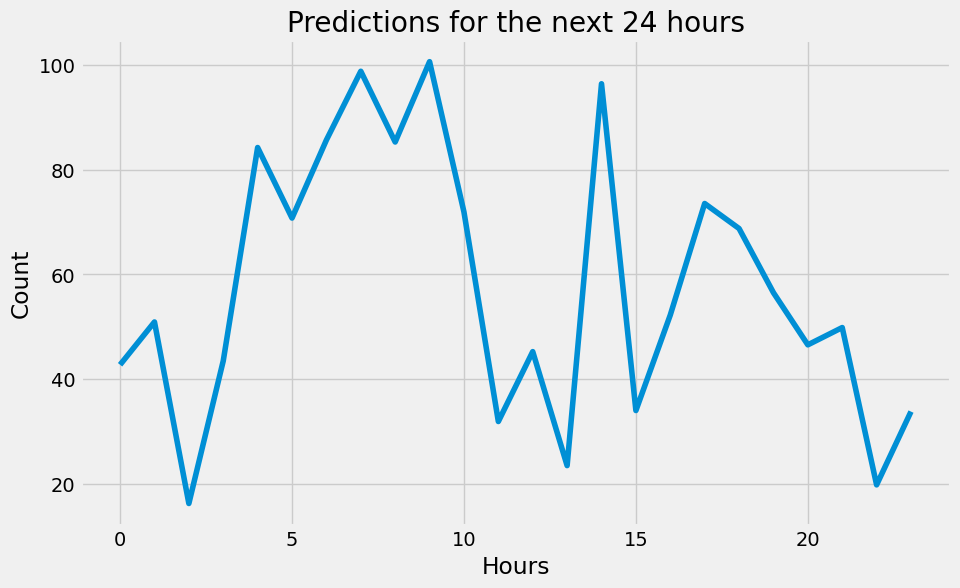

In [ ]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Predictions for the next 24 hours')
plt.plot(predictions)


In [ ]:
# Evaluate the model based on the last 24 hour predictions
y_test_xgb_last_24 = y_test_xgb[-24:]
rmse_xgb_last_24 = np.sqrt(mean_squared_error(y_test_xgb_last_24, predictions))
mae_xgb_last_24 = mean_absolute_error(y_test_xgb_last_24, predictions)

print(f"XGBoost RMSE (last 24 hours): {rmse_xgb_last_24}")
print(f"XGBoost MAE (last 24 hours): {mae_xgb_last_24}")

XGBoost RMSE (last 24 hours): 104.35070293173533
XGBoost MAE (last 24 hours): 80.33960429827373


In [ ]:
# Predictions for the next month

predictions = []
for i in range(24*30):
    data = create_features(data)
    data = data.sort_values('dteday')
    data = data.reset_index(drop=True)

    # Get the last row of the data
    last_row = data.tail(1)

    # Drop the target column
    last_row = last_row.drop(columns=TARGET)

    # Make predictions
    dtest = xgb.DMatrix(last_row[FEATURES_XGB])
    prediction = xgb_model.predict(dtest)

    # Add the prediction to the data
    last_row['cnt'] = prediction
    data = pd.concat([data, last_row], ignore_index=True)

    # Append the prediction to the list
    predictions.append(prediction)


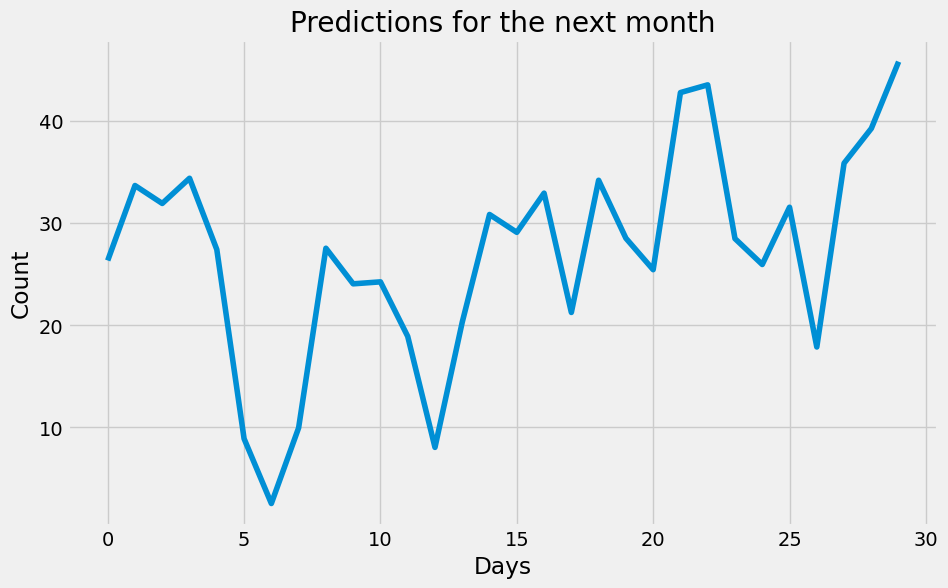

In [ ]:
# Convert predictions to a daily format
daily_predictions = [np.mean(predictions[i*24:(i+1)*24]) for i in range(30)]

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Predictions for the next month')
plt.plot(daily_predictions)
plt.show()

In [ ]:
# Evaluate the model based on the last 30 days predictions
y_test_xgb_last_30 = y_test_xgb[-24*30:]
rmse_xgb_last_30 = np.sqrt(mean_squared_error(y_test_xgb_last_30, predictions))
mae_xgb_last_30 = mean_absolute_error(y_test_xgb_last_30, predictions)

print(f"XGBoost RMSE (next 30 days): {rmse_xgb_last_30}")
print(f"XGBoost MAE (next 30 days): {mae_xgb_last_30}")

XGBoost RMSE (next 30 days): 216.12221770349947
XGBoost MAE (next 30 days): 147.8134009391794


8. Experiment tuning hyperparameters


In [ ]:
# Experiment tuning the hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'colsample_bytree': [0.3, 0.5, 0.8],
    'subsample': [0.5, 0.8, 1],
    'n_estimators': [100, 200, 500],
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_xgb, y_train_xgb)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\victo\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1}


As we can see after the grid search. {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1} Are the best parameters